In [2]:
import os
import pygmt
import pandas as pd
import numpy as np
import obspy
from obspy import read
from glob import glob
import matplotlib.pyplot as plt
from obspy.clients.iris import Client
from obspy.core import Stream
#
pygmt.show_versions()

PyGMT information:
  version: v0.5.0
System information:
  python: 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:22:46) [MSC v.1916 64 bit (AMD64)]
  executable: C:\Users\havin\.conda\envs\obspy\python.exe
  machine: Windows-10-10.0.22000-SP0
Dependency information:
  numpy: 1.18.5
  pandas: 1.4.1
  xarray: 0.21.1
  netCDF4: 1.5.8
  packaging: 21.3
  ghostscript: 9.54.0
  gmt: 6.2.0
GMT library information:
  binary dir: C:/Users/havin/.conda/envs/obspy
  cores: 8
  grid layout: rows
  library path: C:/Users/havin/.conda/envs/obspy/Library/bin/gmt.dll
  padding: 2
  plugin dir: C:/Users/havin/.conda/envs/obspy/Library/bin/gmt_plugins
  share dir: C:/Users/havin/.conda/envs/obspy/Library/share/gmt
  version: 6.2.0


In [14]:
## Figure 1: The study area and geologic features
## Final locations of Catalog combined of IGP and international agencies for tomography
cata = pd.read_csv("SGM_catalog_IGP_2010_2020.txt",
                   skiprows=0,
                   usecols=range(0,10),
                   delim_whitespace=True,
                   #names=None
                   names=["year","month","date","hour","min","sec", "lat","long","dep","mag"]
                   )
cata.head()
# ## Stations
# stas = pd.read_csv("Tomoppndata//00_sta",
#                       delim_whitespace=True,
#                       names=["name","lat","long","elv","res1","res2"]
# )
# stas.head()
cata4 = cata[cata['mag'] >= 4.0].reset_index()
cata5 = cata[cata['mag'] >= 5.0].reset_index()
cata5

index  year  month  date  hour  min   sec     lat     long   dep  mag
0     87  2018      2     9    14   58   6.0  22.381  100.737  28.0  5.0
1     96  2018      8    12    17   44  23.0  24.304  102.597  27.0  5.1
2     97  2018      8    13    19   50  35.0  24.192  102.676  14.0  5.0
3    100  2018      9     8     2   31  30.0  23.195  101.607  13.0  5.9
4    167  2020      7    27     5   14  48.7  20.932  104.701   4.2  5.0

C:\Users\havin\AppData\Local\Temp\ipykernel_8896\2397612183.py:79: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


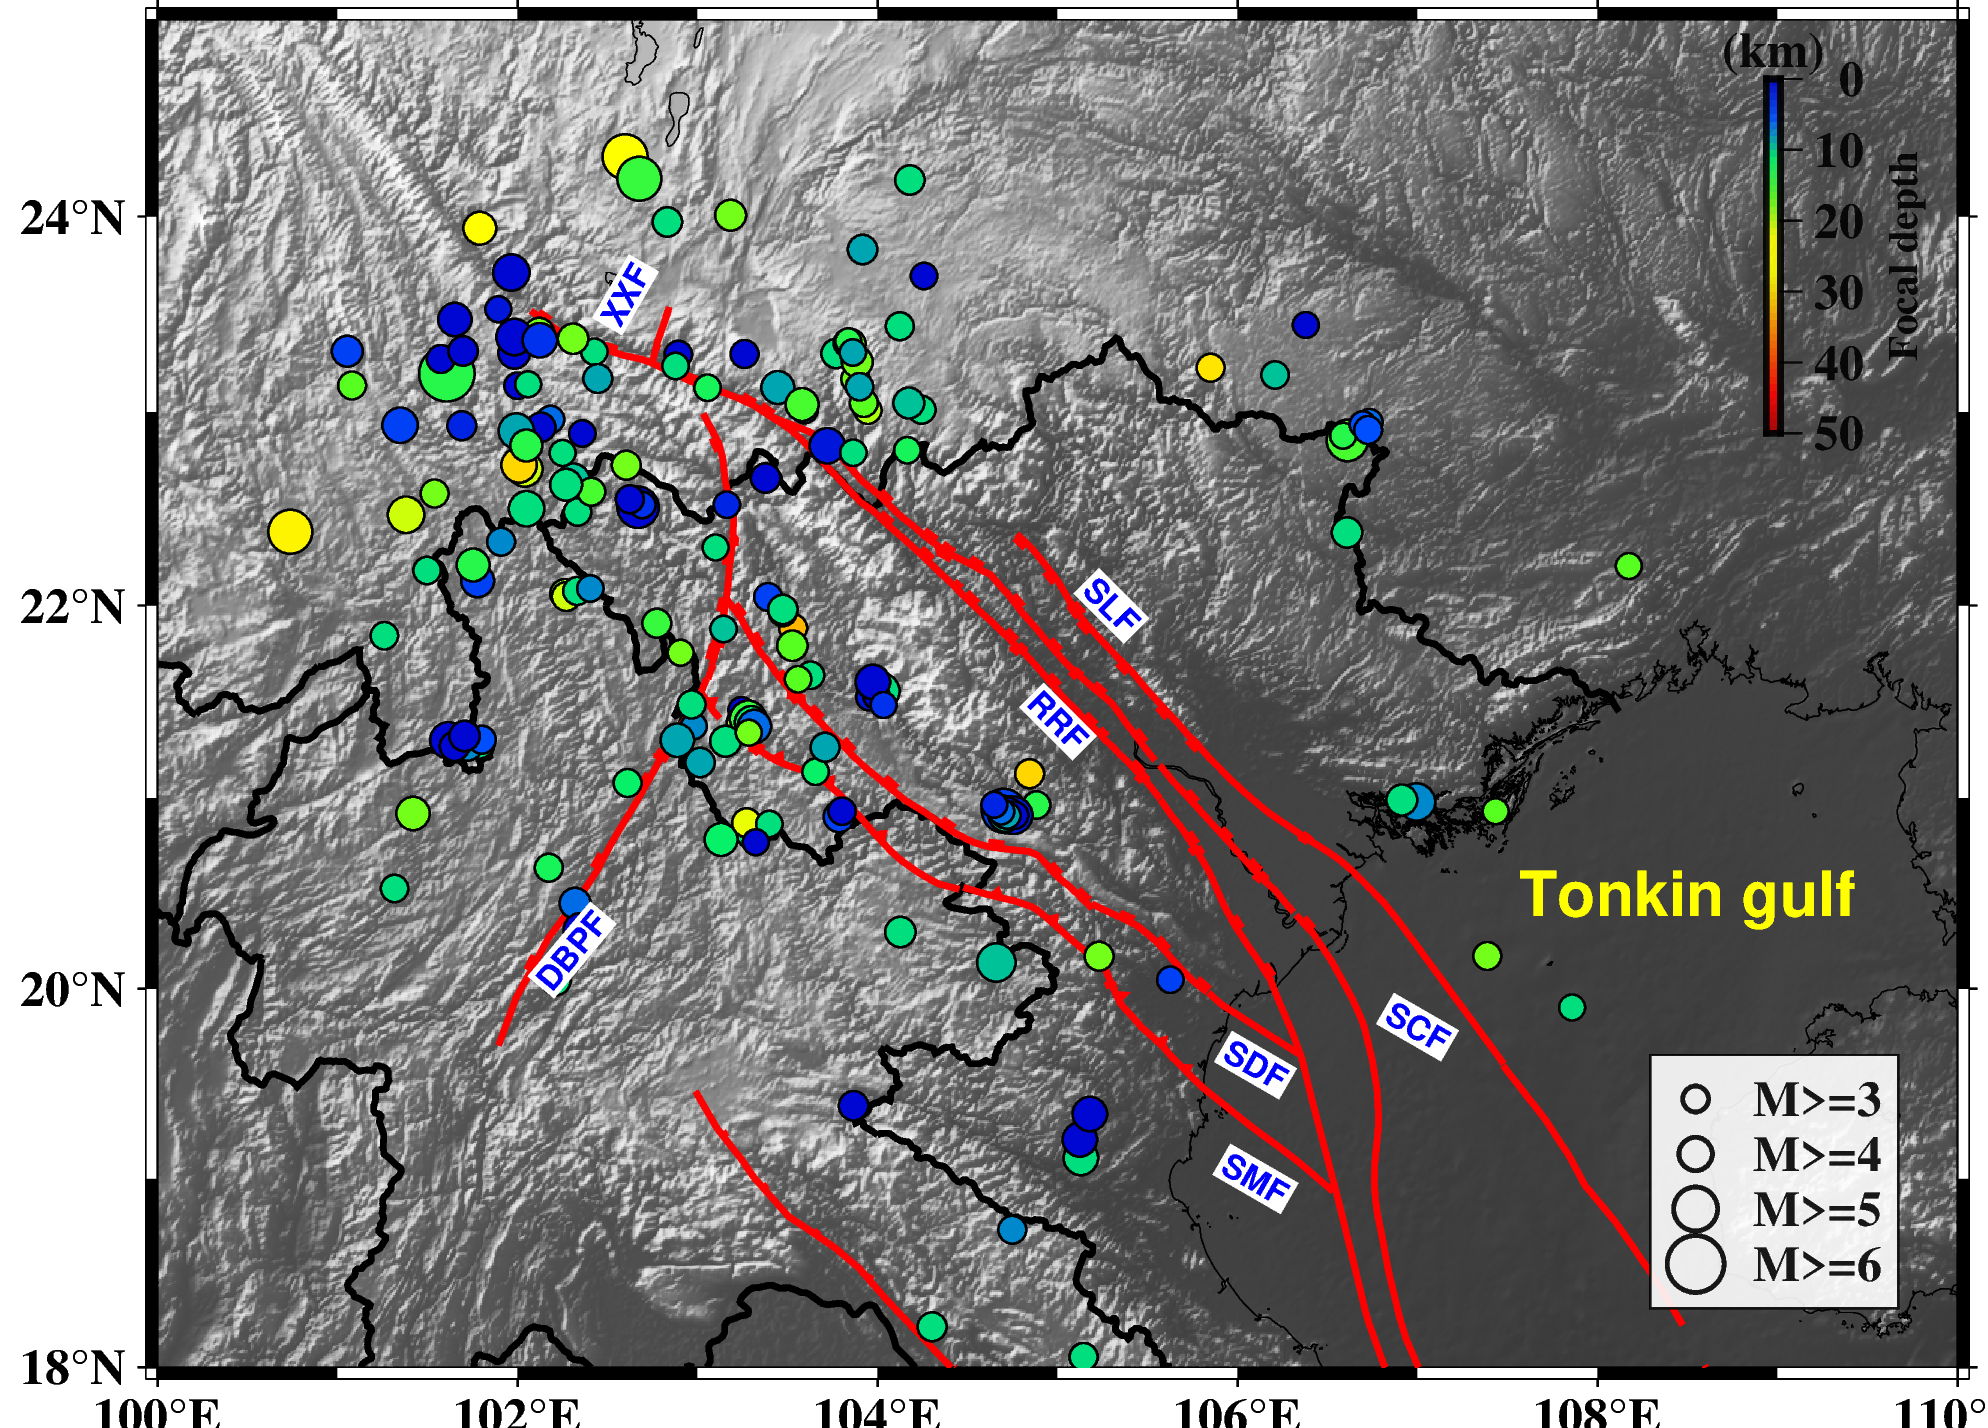

In [15]:
# =================================================================================================================
## Figure 1: The study area and seismicity
# Version 1: 2022-04-16
#==================================================================================================================
#
#pygmt.config(FONT_ANNOT_PRIMARY="Times-Bold")
pygmt.config(FONT_LABEL="10p,Times-Bold,black")
pygmt.config(FONT_TITLE="12p,Times-Bold,black")
pygmt.config(FONT_ANNOT_PRIMARY="12p,Times-Bold,black")
pygmt.config(FONT_ANNOT_SECONDARY="12p,Times-Bold,black")
#
# Load sample earth relief data
pygmt.config(FONT_LABEL="15p,Times-Bold,black")
pygmt.config(FONT_TITLE="15p,Times-Bold,black")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Times-Bold,black")
pygmt.config(FONT_ANNOT_SECONDARY="15p,Times-Bold,black")
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=[100, 110, 18, 25])
fig = pygmt.Figure()
#
pygmt.makecpt(
    #cmap='earth',
    cmap='gray',
    series='-1000/3000/200',
    continuous=True
)
#
fig.grdimage(
    grid=grid,
#     cmap="gray",
    projection="M6i",
    frame=True,
    shading=True,
)
#
# fig.grdcontour(
#     annotation=5000,
#     interval=1000,
#     grid=grid,
#     limit=[0, 3000],
#     projection="M6i",
#     frame=True,
# )
#
fig.coast(
#     region=[minlon, maxlon, minlat, maxlat],
#     projection='M6i',
#    projection='X10i/5i',
    shorelines=True,
#     frame=["a2g1.0","NsWE"],
#     Td=["jCM","+w5c","+pthicker,#306998","+t361/30/15"],
#         "jCM",  # Plot compass on Center Middle
#         "+w5c",  # Width of 5 centimeter
#         "+pthicker,#306998",  # Python 'blue' ring
#         "+t361/30/15",  # Label compass ticks every 361, 30 and 15 degrees
#         "+o0.2c"
#     Td=["jTL+w2c+o0.2c+pthicker+t361/30/15"], # Compass
    borders=["1/1.5p,black","2/1.5p,black","3/1.5p,black"],
)
# Fault system
fig.plot(data="faults_VN/fault_lv1.txt", 
         pen="1.5,red",
#          label='"Major faults"'
        )
# fig.plot(data="faults_VN/fault_lv2.txt", 
#          pen="0.5,gray",
# #          label='"Minor fault"'
#         )
# # Stations
# fig.plot(
#     x=stas.long,
#     y=stas.lat,
#     style="t0.11i",
#     color="darkgrey",
#     pen="1.0p,black"
# )
# Background seismicity
pygmt.makecpt(cmap="seis", series=(0,50,1),reverse=True)
# Catalog
fig.plot(
    y=cata.lat,
    x=cata.long,
    sizes=0.1*1.3**cata.mag,
    color=cata.dep,
    cmap=True,
    style="cc",
    pen="0.5p,black"
)
#
for m in [3,4,5,6]:
    mag = 0.1*1.3**m
    fig.plot(
        x=[0],
        y=[0],
        #color="mediumpurple",
        style='c{}'.format(mag), 
        pen='1p,black',label="M>={}".format(m)
    )
fig.legend(position='JBR+jBR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.colorbar(
    frame=['xa10f50+l"Focal depth"', "ya50f10+l(km)"],
#    position="JML+o2c/3.95c+w-5c/0.3c+n+mc",
    position="JTR+jTR+o1.5c/0.5c+w-3.0c/0.12c",
#     box='+glightyellow+p1p',
    transparency=10
)
################################

# Fault name text
fig.text(text="XXF", x=102.6, y=23.6,angle=60,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SMF", x=106.1, y=19.0,angle=-30,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SCF", x=107.0, y=19.8,angle=-30,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SLF", x=105.3, y=22.0,angle=-45,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SDF", x=106.1, y=19.6,angle=-30,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="RRF", x=105, y=21.4,angle=-45,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="DBPF", x=102.3, y=20.2,angle=50,font="8p,Helvetica-Bold,blue",fill='white')
# fig.text(text="M.F", x=103.8, y=22.0,angle=00,font="8p,Helvetica-Bold,blue")
fig.text(text="Tonkin gulf", x=108.5, y=20.5,angle=0,font="15p,Helvetica-Bold,yellow")
# fig.text(text="(a)", x=101.0, y=18.5,angle=00,font="15p,Times-Bold,black",fill='white')
# Profile line
#fig.plot(x=[102, 107],y=[21.50, 21.50],pen='1.5p,red')
#fig.text(text="A", x=101.9, y=21.50,angle=0,font="8p,Helvetica-Bold,black")
#fig.text(text="A'", x=107.1, y=21.50,angle=0,font="8p,Helvetica-Bold,black")
#
#fig.plot(x=[102.6, 107],y=[22.40, 20.60],pen='1.5p,red')
#fig.text(text="B", x=102.5, y=22.40,angle=-30,font="8p,Helvetica-Bold,black")
#fig.text(text="B'", x=107.1, y=20.60,angle=-30,font="8p,Helvetica-Bold,black")
#
#fig.plot(x=[103, 107],y=[21.00, 23.00],pen='1.5p,red')
#fig.text(text="C", x=102.9, y=21.00,angle=30,font="8p,Helvetica-Bold,black")
#fig.text(text="C'", x=107.1, y=23.00,angle=30,font="8p,Helvetica-Bold,black")
###########################################
fig.savefig("01.All_mag.png",crop=True, dpi=1000, transparent=True)
#fig.show(method='external')
fig.show()

C:\Users\havin\AppData\Local\Temp\ipykernel_8896\3429632158.py:79: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


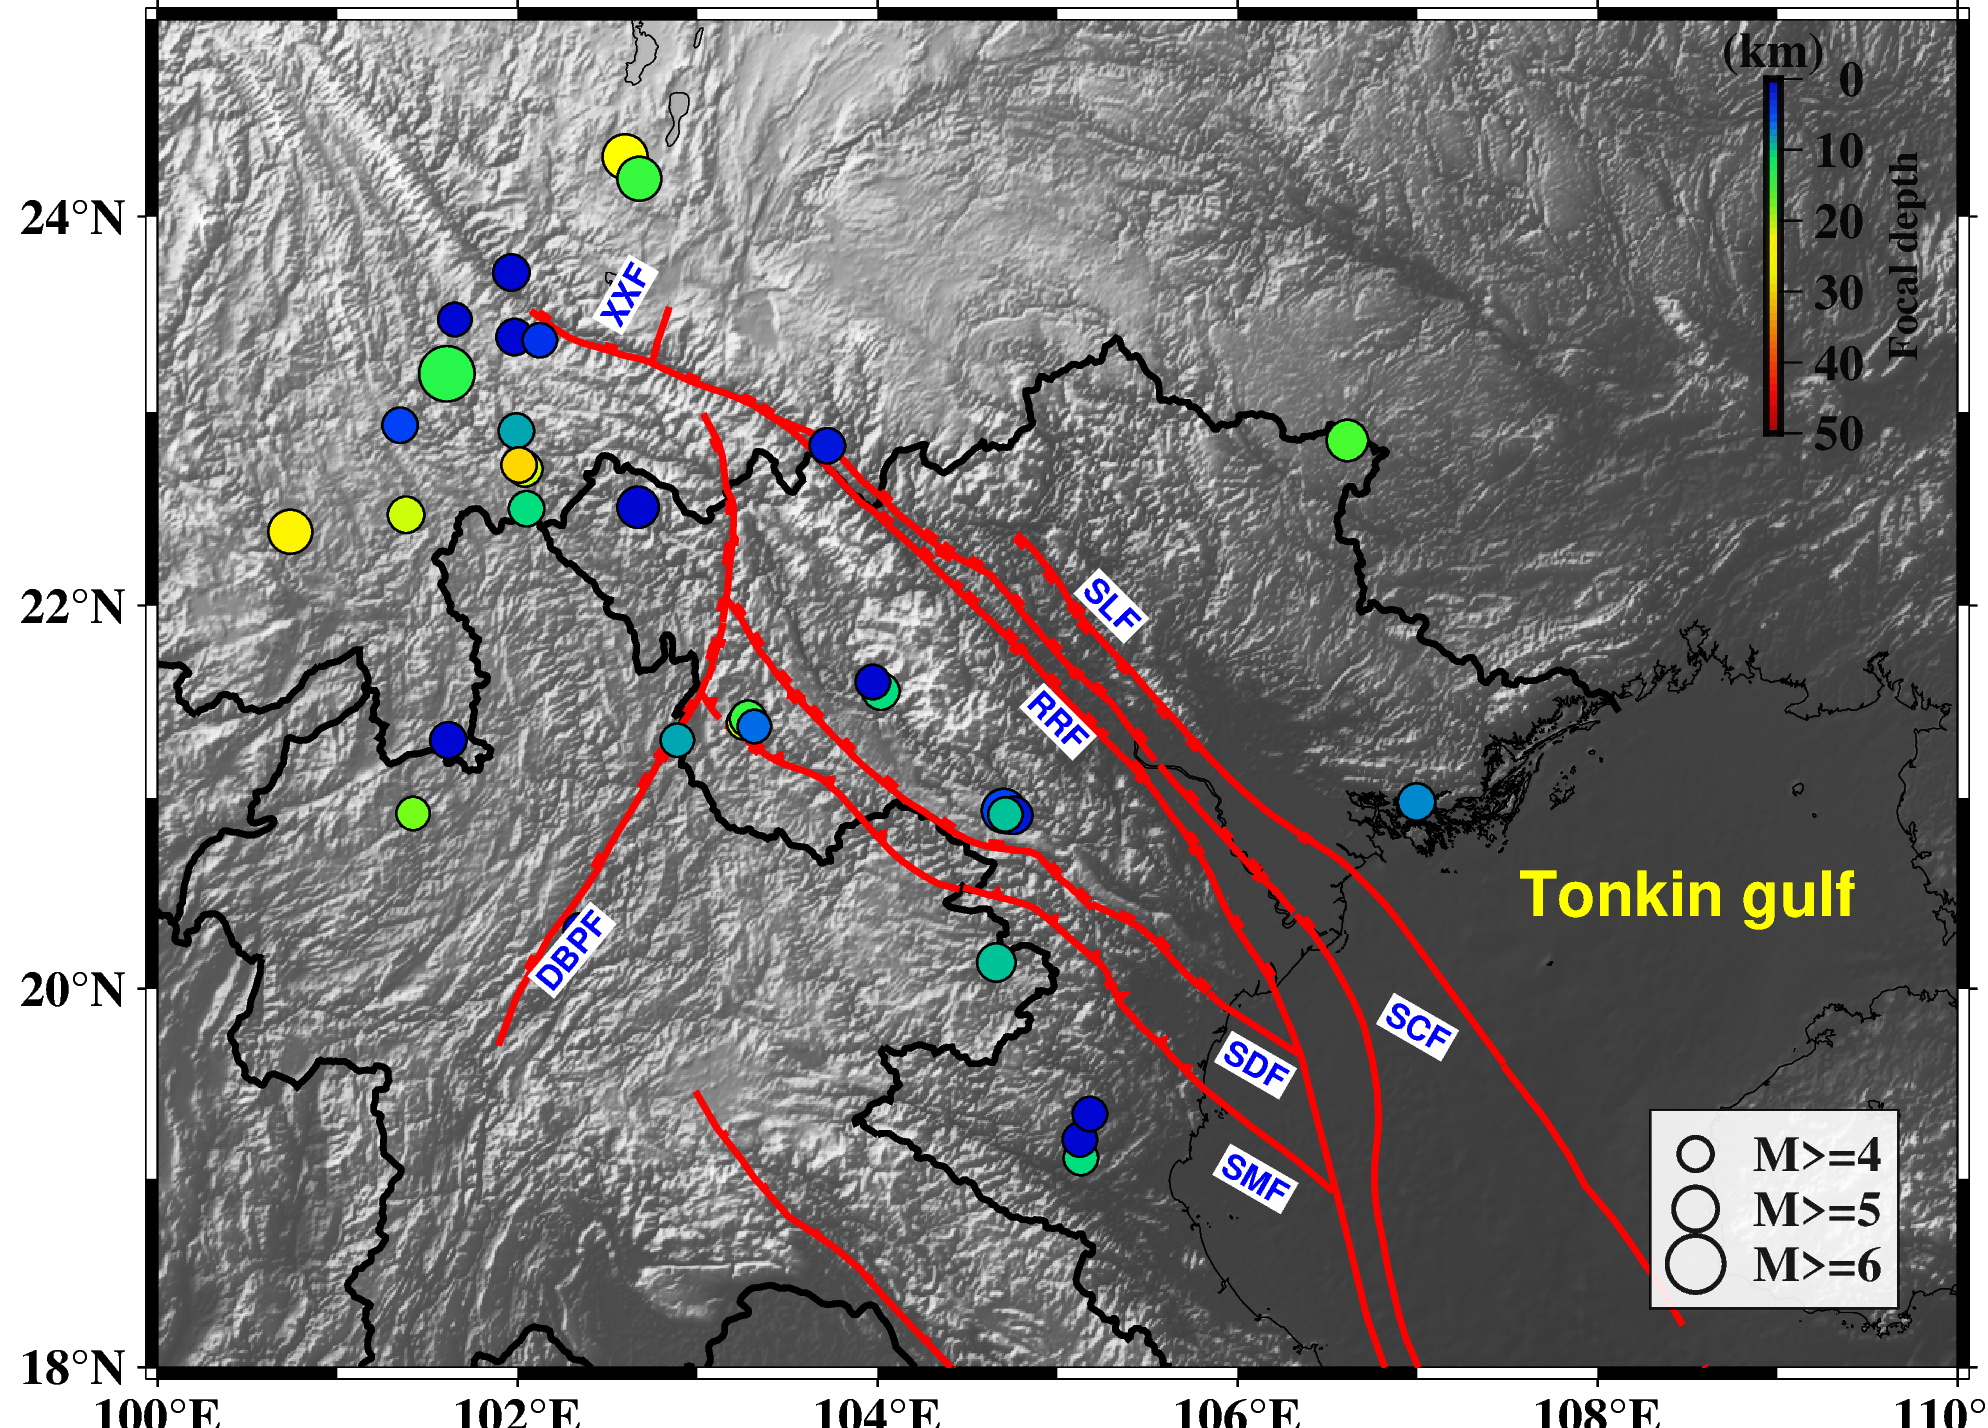

In [17]:
# =================================================================================================================
## Figure 1: The study area and seismicity
# Version 1: 2022-04-16
#==================================================================================================================
#
#pygmt.config(FONT_ANNOT_PRIMARY="Times-Bold")
pygmt.config(FONT_LABEL="10p,Times-Bold,black")
pygmt.config(FONT_TITLE="12p,Times-Bold,black")
pygmt.config(FONT_ANNOT_PRIMARY="12p,Times-Bold,black")
pygmt.config(FONT_ANNOT_SECONDARY="12p,Times-Bold,black")
#
# Load sample earth relief data
pygmt.config(FONT_LABEL="15p,Times-Bold,black")
pygmt.config(FONT_TITLE="15p,Times-Bold,black")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Times-Bold,black")
pygmt.config(FONT_ANNOT_SECONDARY="15p,Times-Bold,black")
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=[100, 110, 18, 25])
fig = pygmt.Figure()
#
pygmt.makecpt(
    #cmap='earth',
    cmap='gray',
    series='-1000/3000/200',
    continuous=True
)
#
fig.grdimage(
    grid=grid,
#     cmap="gray",
    projection="M6i",
    frame=True,
    shading=True,
)
#
# fig.grdcontour(
#     annotation=5000,
#     interval=1000,
#     grid=grid,
#     limit=[0, 3000],
#     projection="M6i",
#     frame=True,
# )
#
fig.coast(
#     region=[minlon, maxlon, minlat, maxlat],
#     projection='M6i',
#    projection='X10i/5i',
    shorelines=True,
#     frame=["a2g1.0","NsWE"],
#     Td=["jCM","+w5c","+pthicker,#306998","+t361/30/15"],
#         "jCM",  # Plot compass on Center Middle
#         "+w5c",  # Width of 5 centimeter
#         "+pthicker,#306998",  # Python 'blue' ring
#         "+t361/30/15",  # Label compass ticks every 361, 30 and 15 degrees
#         "+o0.2c"
#     Td=["jTL+w2c+o0.2c+pthicker+t361/30/15"], # Compass
    borders=["1/1.5p,black","2/1.5p,black","3/1.5p,black"],
)
# Fault system
fig.plot(data="faults_VN/fault_lv1.txt", 
         pen="1.5,red",
#          label='"Major faults"'
        )
# fig.plot(data="faults_VN/fault_lv2.txt", 
#          pen="0.5,gray",
# #          label='"Minor fault"'
#         )
# # Stations
# fig.plot(
#     x=stas.long,
#     y=stas.lat,
#     style="t0.11i",
#     color="darkgrey",
#     pen="1.0p,black"
# )
# Background seismicity
pygmt.makecpt(cmap="seis", series=(0,50,1),reverse=True)
# Catalog
fig.plot(
    y=cata4.lat,
    x=cata4.long,
    sizes=0.1*1.3**cata4.mag,
    color=cata4.dep,
    cmap=True,
    style="cc",
    pen="0.5p,black"
)
#
for m in [4,5,6]:
    mag = 0.1*1.3**m
    fig.plot(
        x=[0],
        y=[0],
        #color="mediumpurple",
        style='c{}'.format(mag), 
        pen='1p,black',label="M>={}".format(m)
    )
fig.legend(position='JBR+jBR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.colorbar(
    frame=['xa10f50+l"Focal depth"', "ya50f10+l(km)"],
#    position="JML+o2c/3.95c+w-5c/0.3c+n+mc",
    position="JTR+jTR+o1.5c/0.5c+w-3.0c/0.12c",
#     box='+glightyellow+p1p',
    transparency=10
)
################################

# Fault name text
fig.text(text="XXF", x=102.6, y=23.6,angle=60,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SMF", x=106.1, y=19.0,angle=-30,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SCF", x=107.0, y=19.8,angle=-30,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SLF", x=105.3, y=22.0,angle=-45,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SDF", x=106.1, y=19.6,angle=-30,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="RRF", x=105, y=21.4,angle=-45,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="DBPF", x=102.3, y=20.2,angle=50,font="8p,Helvetica-Bold,blue",fill='white')
# fig.text(text="M.F", x=103.8, y=22.0,angle=00,font="8p,Helvetica-Bold,blue")
fig.text(text="Tonkin gulf", x=108.5, y=20.5,angle=0,font="15p,Helvetica-Bold,yellow")
# fig.text(text="(a)", x=101.0, y=18.5,angle=00,font="15p,Times-Bold,black",fill='white')
# Profile line
#fig.plot(x=[102, 107],y=[21.50, 21.50],pen='1.5p,red')
#fig.text(text="A", x=101.9, y=21.50,angle=0,font="8p,Helvetica-Bold,black")
#fig.text(text="A'", x=107.1, y=21.50,angle=0,font="8p,Helvetica-Bold,black")
#
#fig.plot(x=[102.6, 107],y=[22.40, 20.60],pen='1.5p,red')
#fig.text(text="B", x=102.5, y=22.40,angle=-30,font="8p,Helvetica-Bold,black")
#fig.text(text="B'", x=107.1, y=20.60,angle=-30,font="8p,Helvetica-Bold,black")
#
#fig.plot(x=[103, 107],y=[21.00, 23.00],pen='1.5p,red')
#fig.text(text="C", x=102.9, y=21.00,angle=30,font="8p,Helvetica-Bold,black")
#fig.text(text="C'", x=107.1, y=23.00,angle=30,font="8p,Helvetica-Bold,black")
###########################################
fig.savefig("01.All_mag_greater_4.png",crop=True, dpi=1000, transparent=True)
#fig.show(method='external')
fig.show()

C:\Users\havin\AppData\Local\Temp\ipykernel_8896\1625153772.py:79: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


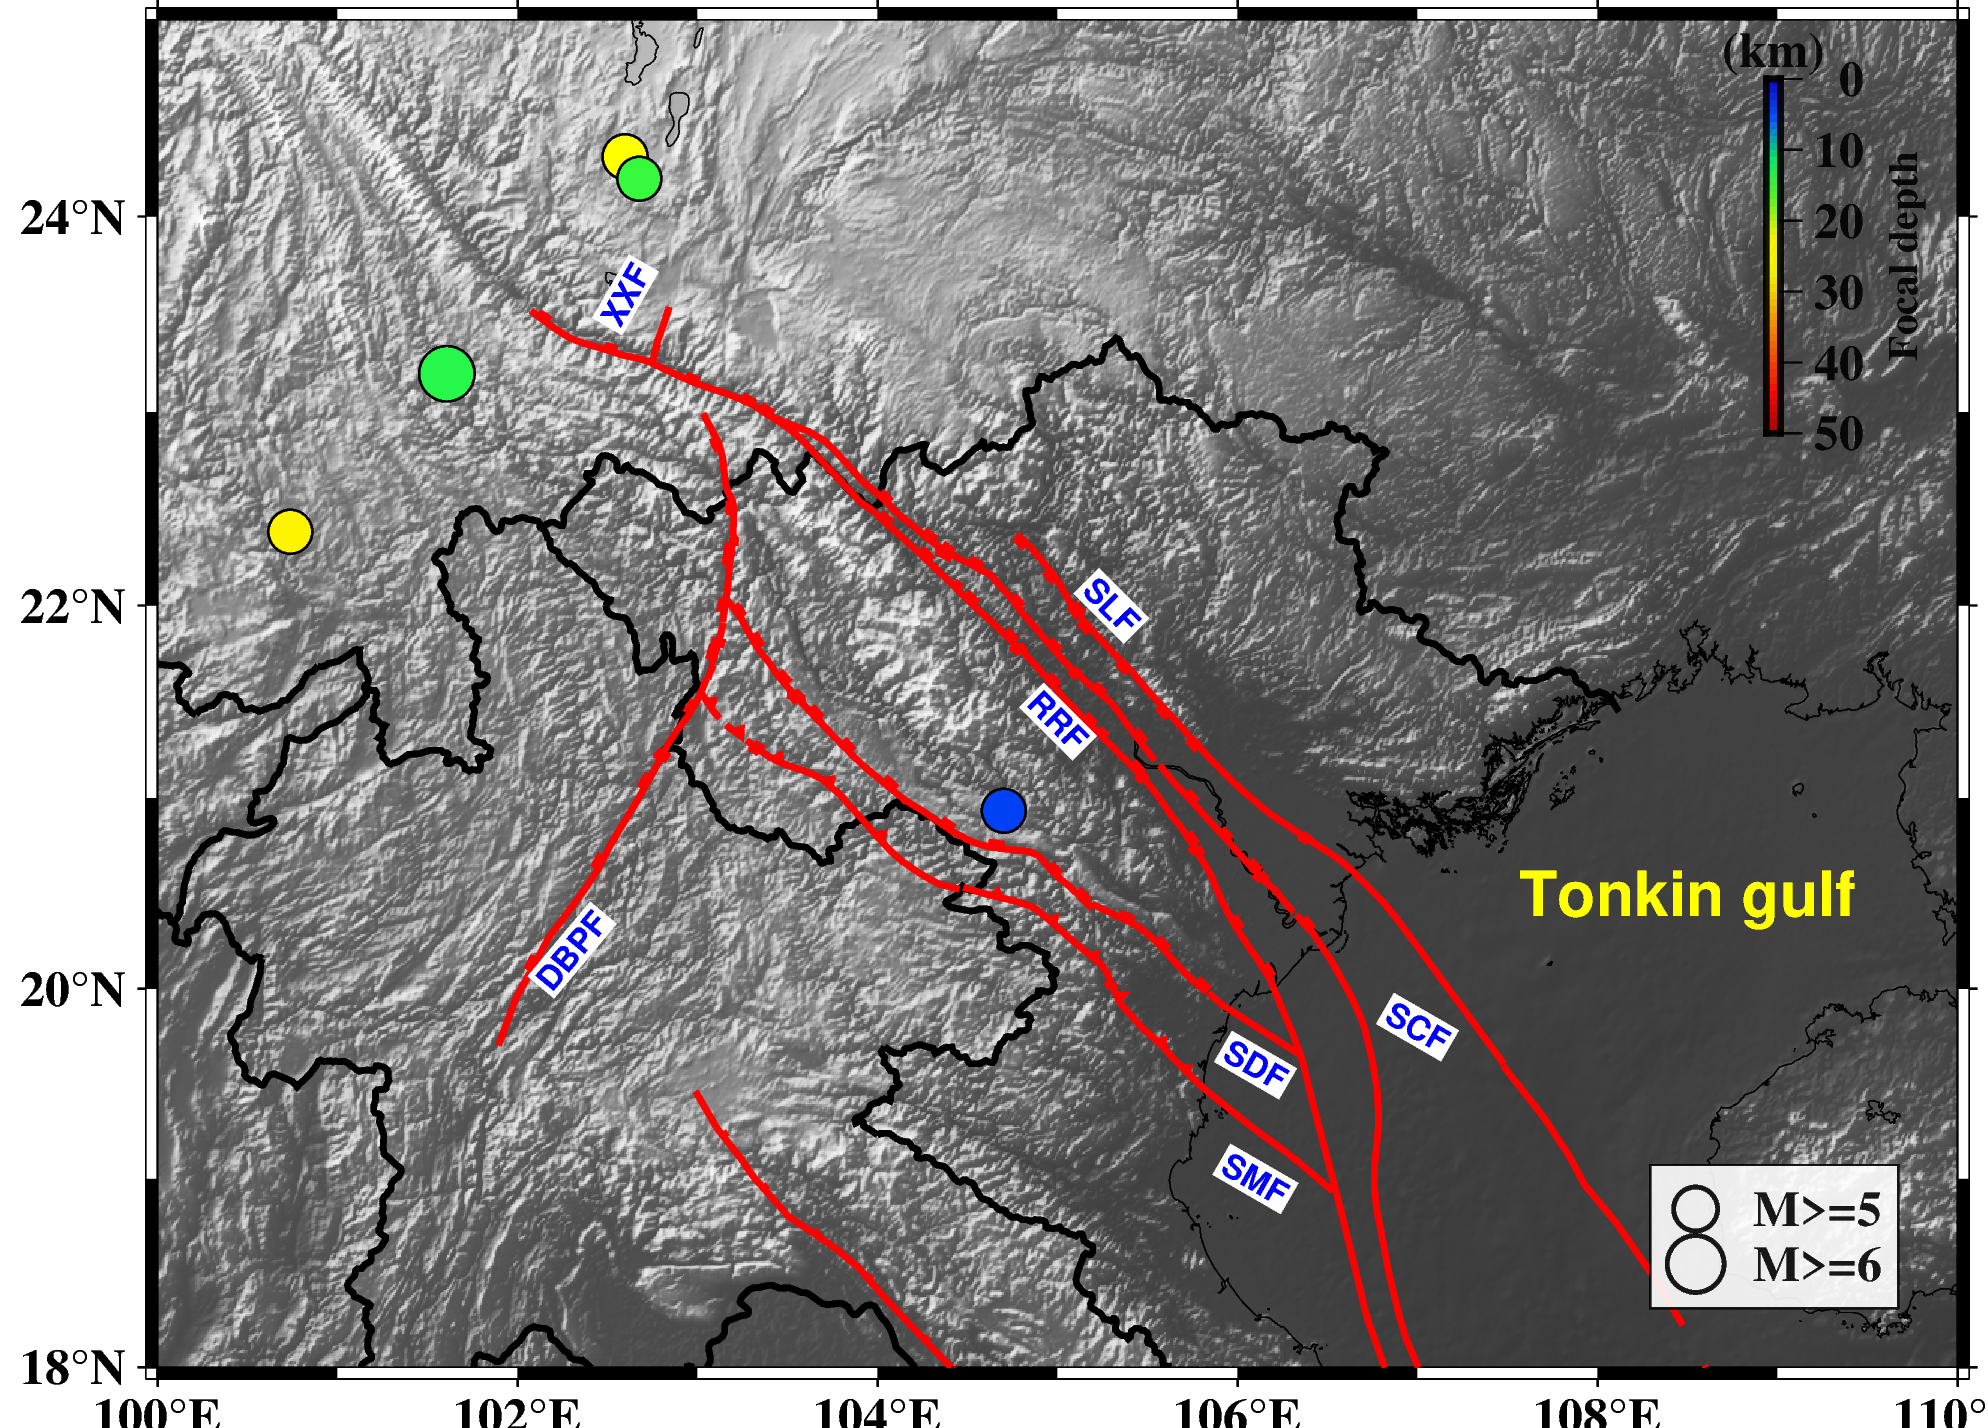

In [18]:
# =================================================================================================================
## Figure 1: The study area and seismicity
# Version 1: 2022-04-16
#==================================================================================================================
#
#pygmt.config(FONT_ANNOT_PRIMARY="Times-Bold")
pygmt.config(FONT_LABEL="10p,Times-Bold,black")
pygmt.config(FONT_TITLE="12p,Times-Bold,black")
pygmt.config(FONT_ANNOT_PRIMARY="12p,Times-Bold,black")
pygmt.config(FONT_ANNOT_SECONDARY="12p,Times-Bold,black")
#
# Load sample earth relief data
pygmt.config(FONT_LABEL="15p,Times-Bold,black")
pygmt.config(FONT_TITLE="15p,Times-Bold,black")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Times-Bold,black")
pygmt.config(FONT_ANNOT_SECONDARY="15p,Times-Bold,black")
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=[100, 110, 18, 25])
fig = pygmt.Figure()
#
pygmt.makecpt(
    #cmap='earth',
    cmap='gray',
    series='-1000/3000/200',
    continuous=True
)
#
fig.grdimage(
    grid=grid,
#     cmap="gray",
    projection="M6i",
    frame=True,
    shading=True,
)
#
# fig.grdcontour(
#     annotation=5000,
#     interval=1000,
#     grid=grid,
#     limit=[0, 3000],
#     projection="M6i",
#     frame=True,
# )
#
fig.coast(
#     region=[minlon, maxlon, minlat, maxlat],
#     projection='M6i',
#    projection='X10i/5i',
    shorelines=True,
#     frame=["a2g1.0","NsWE"],
#     Td=["jCM","+w5c","+pthicker,#306998","+t361/30/15"],
#         "jCM",  # Plot compass on Center Middle
#         "+w5c",  # Width of 5 centimeter
#         "+pthicker,#306998",  # Python 'blue' ring
#         "+t361/30/15",  # Label compass ticks every 361, 30 and 15 degrees
#         "+o0.2c"
#     Td=["jTL+w2c+o0.2c+pthicker+t361/30/15"], # Compass
    borders=["1/1.5p,black","2/1.5p,black","3/1.5p,black"],
)
# Fault system
fig.plot(data="faults_VN/fault_lv1.txt", 
         pen="1.5,red",
#          label='"Major faults"'
        )
# fig.plot(data="faults_VN/fault_lv2.txt", 
#          pen="0.5,gray",
# #          label='"Minor fault"'
#         )
# # Stations
# fig.plot(
#     x=stas.long,
#     y=stas.lat,
#     style="t0.11i",
#     color="darkgrey",
#     pen="1.0p,black"
# )
# Background seismicity
pygmt.makecpt(cmap="seis", series=(0,50,1),reverse=True)
# Catalog
fig.plot(
    y=cata5.lat,
    x=cata5.long,
    sizes=0.1*1.3**cata5.mag,
    color=cata5.dep,
    cmap=True,
    style="cc",
    pen="0.5p,black"
)
#
for m in [5,6]:
    mag = 0.1*1.3**m
    fig.plot(
        x=[0],
        y=[0],
        #color="mediumpurple",
        style='c{}'.format(mag), 
        pen='1p,black',label="M>={}".format(m)
    )
fig.legend(position='JBR+jBR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.colorbar(
    frame=['xa10f50+l"Focal depth"', "ya50f10+l(km)"],
#    position="JML+o2c/3.95c+w-5c/0.3c+n+mc",
    position="JTR+jTR+o1.5c/0.5c+w-3.0c/0.12c",
#     box='+glightyellow+p1p',
    transparency=10
)
################################

# Fault name text
fig.text(text="XXF", x=102.6, y=23.6,angle=60,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SMF", x=106.1, y=19.0,angle=-30,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SCF", x=107.0, y=19.8,angle=-30,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SLF", x=105.3, y=22.0,angle=-45,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="SDF", x=106.1, y=19.6,angle=-30,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="RRF", x=105, y=21.4,angle=-45,font="8p,Helvetica-Bold,blue",fill='white')
fig.text(text="DBPF", x=102.3, y=20.2,angle=50,font="8p,Helvetica-Bold,blue",fill='white')
# fig.text(text="M.F", x=103.8, y=22.0,angle=00,font="8p,Helvetica-Bold,blue")
fig.text(text="Tonkin gulf", x=108.5, y=20.5,angle=0,font="15p,Helvetica-Bold,yellow")
# fig.text(text="(a)", x=101.0, y=18.5,angle=00,font="15p,Times-Bold,black",fill='white')
# Profile line
#fig.plot(x=[102, 107],y=[21.50, 21.50],pen='1.5p,red')
#fig.text(text="A", x=101.9, y=21.50,angle=0,font="8p,Helvetica-Bold,black")
#fig.text(text="A'", x=107.1, y=21.50,angle=0,font="8p,Helvetica-Bold,black")
#
#fig.plot(x=[102.6, 107],y=[22.40, 20.60],pen='1.5p,red')
#fig.text(text="B", x=102.5, y=22.40,angle=-30,font="8p,Helvetica-Bold,black")
#fig.text(text="B'", x=107.1, y=20.60,angle=-30,font="8p,Helvetica-Bold,black")
#
#fig.plot(x=[103, 107],y=[21.00, 23.00],pen='1.5p,red')
#fig.text(text="C", x=102.9, y=21.00,angle=30,font="8p,Helvetica-Bold,black")
#fig.text(text="C'", x=107.1, y=23.00,angle=30,font="8p,Helvetica-Bold,black")
###########################################
fig.savefig("01.All_mag_greater_5.png",crop=True, dpi=1000, transparent=True)
#fig.show(method='external')
fig.show()